Demo of micro-grad on binary classification.

Import the necessary libraries

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP
np.random.seed(1337)
random.seed(1337)

making the dataset

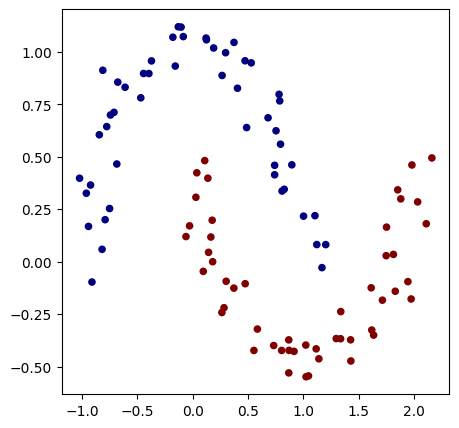

In [4]:
# make up a dataset

from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [5]:
model = MLP(2,[16,16,1])

In [6]:
# loss function
def loss(batch_size=None):
    
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    # converts vector elements to Value objects
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # feed the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) / len(losses)
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi*scorei.data>0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Value(data=0.8958441028683222, grad=0) 0.5


In [8]:
for k in range(100):
    #forward pass
    total_loss,acc=loss()

    #backward pass
    # for p in model.parameters():
    #     p.grad=0
    model.zero_grad()
    total_loss.backward()

    #parameter update
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data += -learning_rate*p.grad
    print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

step 0 loss 0.045306841790015845, accuracy 100.0%
step 1 loss 0.12901006034912166, accuracy 95.0%
step 2 loss 0.21833575898541152, accuracy 96.0%
step 3 loss 0.45487674267073236, accuracy 86.0%
step 4 loss 0.19345611466548662, accuracy 92.0%
step 5 loss 0.13983677853615006, accuracy 94.0%
step 6 loss 0.0973699901784026, accuracy 96.0%
step 7 loss 0.07349041946384781, accuracy 98.0%
step 8 loss 0.07575208564042578, accuracy 97.0%
step 9 loss 0.0699398681820044, accuracy 98.0%
step 10 loss 0.10236279342384925, accuracy 96.0%
step 11 loss 0.03512490211227863, accuracy 99.0%
step 12 loss 0.07202841978102695, accuracy 97.0%
step 13 loss 0.15119852902239775, accuracy 95.0%
step 14 loss 0.08597786883868394, accuracy 96.0%
step 15 loss 0.03957930411006713, accuracy 99.0%
step 16 loss 0.02401621847621639, accuracy 100.0%
step 17 loss 0.031415406133682135, accuracy 99.0%
step 18 loss 0.03605269631443055, accuracy 100.0%
step 19 loss 0.11643998342697057, accuracy 96.0%
step 20 loss 0.057191551308

(-1.548639298268643, 1.951360701731357)

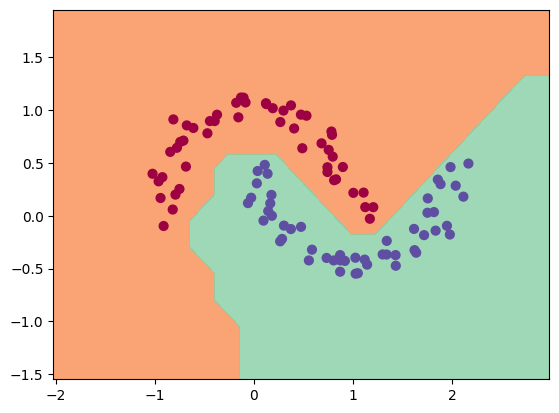

In [9]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())